In [1]:

!pip install textblob vaderSentiment wordcloud


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


In [2]:
from google.colab import files
uploaded = files.upload()


Saving student_feedback.csv to student_feedback.csv


In [3]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df.head()



Saving student_feedback.csv to student_feedback (1).csv


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [4]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   unnamed:_0                                            1001 non-null   int64
 1   student_id                                            1001 non-null   int64
 2   well_versed_with_the_subject                          1001 non-null   int64
 3   explains_concepts_in_an_understandable_way            1001 non-null   int64
 4   use_of_presentations                                  1001 non-null   int64
 5   degree_of_difficulty_of_assignments                   1001 non-null   int64
 6   solves_doubts_willingly                               1001 non-null   int64
 7   structuring_of_the_course                             1001 non-null   int64
 8   provides_support_for_students_going_above_and_beyond  1001 non-null   int64
 9

,unnamed:_0,student_id,well_versed_with_the_subject,explains_concepts_in_an_understandable_way,use_of_presentations,degree_of_difficulty_of_assignments,solves_doubts_willingly,structuring_of_the_course,provides_support_for_students_going_above_and_beyond,course_recommendation_based_on_relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,289.108111,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,0.000000,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.000000,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,500.000000,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.000000,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


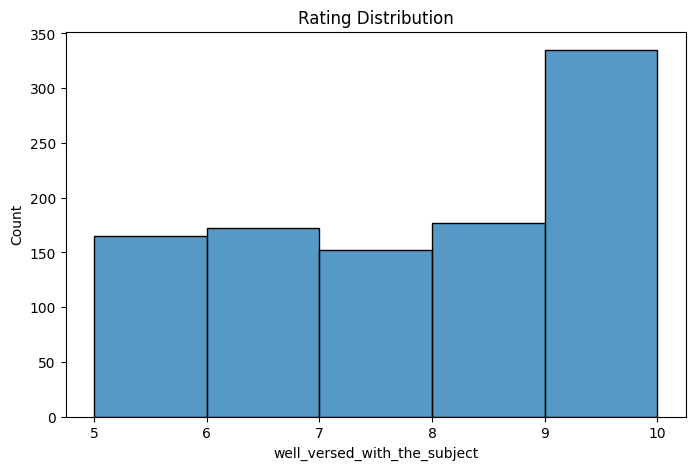

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['well_versed_with_the_subject'], bins=5)
plt.title("Rating Distribution")
plt.show()

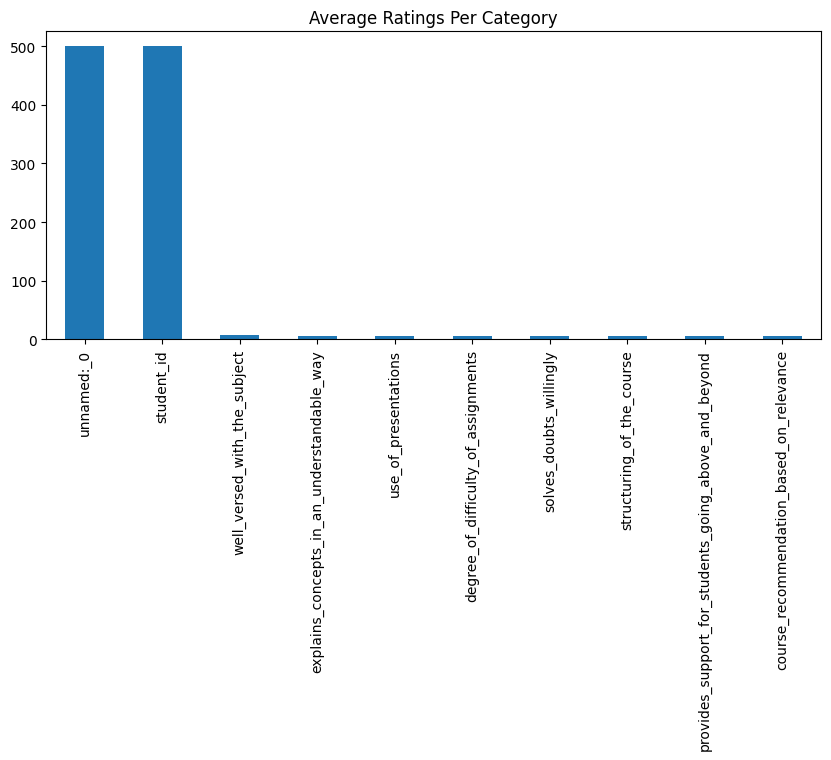

In [9]:
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols].mean().plot(kind='bar', figsize=(10,4))
plt.title("Average Ratings Per Category")
plt.show()



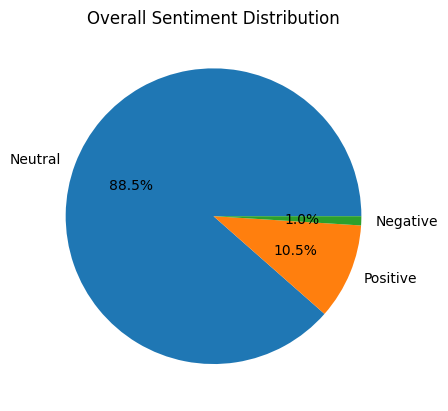

In [12]:
feedback_cols = [
    'well_versed_with_the_subject',
    'explains_concepts_in_an_understandable_way',
    'use_of_presentations',
    'degree_of_difficulty_of_assignments',
    'solves_doubts_willingly',
    'structuring_of_the_course',
    'provides_support_for_students_going_above_and_beyond',
    'course_recommendation_based_on_relevance'
]

df['overall_rating'] = df[feedback_cols].mean(axis=1)

def classify_sentiment(rating):
    if rating > 7:
        return 'Positive'
    elif rating < 4:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['overall_rating'].apply(classify_sentiment)

df['sentiment_label'].value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.title("Overall Sentiment Distribution")
plt.ylabel('') # Hide the y-label for a cleaner pie chart
plt.show()

In [14]:
# Cannot generate a word cloud as there is no text data in the DataFrame.
# Please ensure your DataFrame contains a column with textual feedback or comments.
# For example, if you had a column named 'feedback_text', you would use:
# text = ' '.join(df['feedback_text'].astype(str))
# wc = WordCloud(width=800, height=400, background_color='white').generate(text)

# plt.figure(figsize=(10,6))
# plt.imshow(wc)
# plt.axis("off")
# plt.show()